# Generalized Shallow Water Equations

In [33]:
load('GeneralizedShallowWaterVariables.sage')

LegendrePolynomials.sage tests passed


## One Dimension

### Zeroth Order/Constant System/Shallow Water Equations

In [38]:
set_generalized_shallow_water_variables_1d(0)
eig = A_p.eigenvectors_right()
eigenvalues = [e[0].simplify_full() for e in eig]
eigenvectors = [[ev.simplify_full() for ev in e[1]] for e in eig]
R = matrix([ev[0] for ev in eigenvectors]).T
L = R.inverse().simplify_full()
print(eigenvalues)
print(R)
print(L)

[u - sqrt(g*h), u + sqrt(g*h)]
[            1             1]
[u - sqrt(g*h) u + sqrt(g*h)]
[ 1/2*(u + sqrt(g*h))/sqrt(g*h)                 -1/2/sqrt(g*h)]
[-1/2*(u - sqrt(g*h))/sqrt(g*h)                  1/2/sqrt(g*h)]


In [39]:
(L[0, 0] - 1/2 * u / sqrt(g * h) - 1/2).simplify_full()

0

In [40]:
(L * R).simplify_full()

[1 0]
[0 1]

In [41]:
# convexity \grad \lambda_i . v_i doesn't change sign
grad_lambda_0 = vector([eigenvalues[0].subs(p_to_q).diff(q[i]).subs(q_to_p) for i in range(2)])
grad_lambda_1 = vector([eigenvalues[1].subs(p_to_q).diff(q[i]).subs(q_to_p) for i in range(2)])
print(grad_lambda_0.dot_product(eigenvectors[0][0]).full_simplify())
print(grad_lambda_1.dot_product(eigenvectors[1][0]).full_simplify())

-3/2*g/sqrt(g*h)
3/2*g/sqrt(g*h)


### First Order/Linear System

In [43]:
set_generalized_shallow_water_variables_1d(1)
eig = A_p.eigenvectors_right()
eigenvalues = [e[0].simplify_full() for e in eig]
eigenvalues.sort()
eigenvectors = [[ev.simplify_full() for ev in e[1]] for e in eig]
R = matrix([ev[0] for ev in eigenvectors]).T.simplify_full()
G = PermutationGroup([(2, 3)])
R.permute_columns(G.gens()[0])
L = R.inverse().simplify_full()
print(eigenvalues)
print("R")
print(R)
print("L")
print(L)

[u - sqrt(g*h + s^2), u, u + sqrt(g*h + s^2)]
R
[                   1                    1                    1]
[ u - sqrt(g*h + s^2)                    u  u + sqrt(g*h + s^2)]
[                 2*s -1/2*(3*g*h - s^2)/s                  2*s]
L
[                     1/6*(3*g*h - s^2 + 3*sqrt(g*h + s^2)*u)/(g*h + s^2)                                                     -1/2/sqrt(g*h + s^2)                                                        1/3*s/(g*h + s^2)]
[                                                     4/3*s^2/(g*h + s^2)                                                                        0                                                       -2/3*s/(g*h + s^2)]
[-1/6*(3*(g*h + s^2)*u - (3*g*h - s^2)*sqrt(g*h + s^2))/(g*h + s^2)^(3/2)                                                      1/2/sqrt(g*h + s^2)                                                        1/3*s/(g*h + s^2)]


In [45]:
# convexity
grad_lambda_0 = vector([eigenvalues[0].subs(p_to_q).diff(q[i]).subs(q_to_p) for i in range(3)])
grad_lambda_1 = vector([eigenvalues[1].subs(p_to_q).diff(q[i]).subs(q_to_p) for i in range(3)])
grad_lambda_2 = vector([eigenvalues[2].subs(p_to_q).diff(q[i]).subs(q_to_p) for i in range(3)])
print(grad_lambda_0.dot_product(eigenvectors[0][0]).full_simplify())
print(grad_lambda_1.dot_product(eigenvectors[1][0]).full_simplify())
print(grad_lambda_2.dot_product(eigenvectors[2][0]).full_simplify())

-1/2*(3*g*h + 4*s^2)*sqrt(g*h + s^2)/(g*h^2 + h*s^2)
sqrt(g*h + s^2)/h
-1/2*(2*g*h + s^2)*sqrt(g*h + s^2)/(g*h^2 + h*s^2)


### Second Order/Quadratic

In [144]:
import numpy as np
import matplotlib.pyplot as plt

def is_hyperbolic(A):
    # A is square 2D numpy array
    eigenvalues = np.linalg.eigvals(A)
    return np.all(np.isreal(eigenvalues))

def hyperbolicity_data(A, sample):
    # A is symbolic sage matrix
    n = len(sample)
    data = np.zeros((n, n), dtype=int)
    for i in range(n):
        a0 = sample[i]
        for j in range(n):
            a1 = sample[j]
            A_np = A.subs({e_z: 1, g: 1, h: 0.1, u: 0, alpha_0: a0, alpha_1: a1}).numpy(dtype=np.float64)
            data[i, j] = int(is_hyperbolic(A_np))
    return data

In [137]:
set_generalized_shallow_water_variables_1d(2)

#eig = A_p.eigenvectors_right()
#eigenvalues = [e[0].simplify_full() for e in eig]
#eigenvectors = [[ev.simplify_full() for ev in e[1]] for e in eig]

In [152]:
data = hyperbolicity_data(A_p, np.linspace(-1, 1, 200))

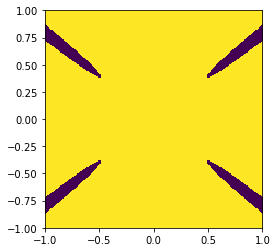

In [155]:
plt.imshow(data, extent=(-1, 1, -1, 1))
plt.show()

In [59]:
test = [[f(x, y) for x in srange(-1, 1, 0.2)] for y in srange(-1, 1, 0.2)]

In [78]:
def is_hyperbolic(A):
    eig = A.eigenvectors_right()
    eigenvalues = [e[0] for e in eig]
    return all([e.is_real() for e in eigenvalues])

def hyperbolicity_range(A, range_):
    hyperbolicity = [[int(is_hyperbolic(A.subs({alpha_0: x, alpha_1: y}))) for x in range_] for y in range_]
    coordinates = [[(x, y) for x in range_] for y in range_]
    M = matrix(hyperbolicity)
    return (M, coordinates)

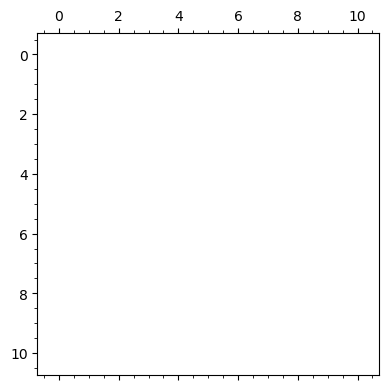

In [91]:
tuple_ = hyperbolicity_range(A_p, srange(-1, 1.2, 0.2))
matrix_plot(tuple_[0])

### Third Order/Cubic Moments

In [195]:
import numpy as np
import matplotlib.pyplot as plt

def is_hyperbolic(A):
    # A is square 2D numpy array
    eigenvalues = np.linalg.eigvals(A)
    return np.all(np.isreal(eigenvalues))

def hyperbolicity_data(A, sample):
    # A is symbolic sage matrix
    n = len(sample)
    data = np.zeros((n, n, n), dtype=int)
    for i in range(n):
        a0 = sample[i]
        for j in range(n):
            a1 = sample[j]
            for k in range(n):
                a2 = sample[k]
                A_np = A.subs({e_z: 1, g: 1, h: 0.1, u: 0, alpha_0: a0, alpha_1: a1, alpha_2: a2}).numpy(dtype=np.float64)
                data[i, j, k] = int(is_hyperbolic(A_np))
    return data

In [196]:
set_generalized_shallow_water_variables_1d(3)

In [197]:
n = 201
sample = np.linspace(-1, 1, n)
data_3 = hyperbolicity_data(A_p, sample)

KeyboardInterrupt: 

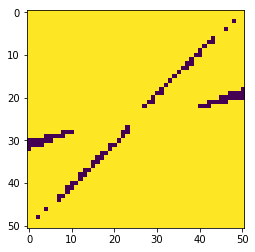

In [194]:
nd2 = (n - 1)/2
plt.imshow(data_3[:,nd2,:])

In [199]:
A_np = A_p.subs({e_z: 1, g: 1, h: 1.0, u: 0, alpha_0: -0.25, alpha_1: 0.0, alpha_2: 0.25}).numpy(dtype=np.float64)
is_hyperbolic(A_np)

False

In [200]:
np.linalg.eigvals(A_np)

array([-1.04368851e+00+0.00000000e+00j,  1.04368851e+00+0.00000000e+00j,
       -4.13590306e-25+1.17527811e-09j, -4.13590306e-25-1.17527811e-09j,
        9.89711669e-25+0.00000000e+00j])

In [210]:
A_np[4]

array([0.00000000e+00, 5.00000000e-01, 0.00000000e+00, 2.77555756e-17,
       0.00000000e+00])

In [209]:
A_p[3].simplify_full()

(-2/3*alpha_0^2 - 2/7*alpha_1^2 - 6/7*alpha_0*alpha_2 - 4/21*alpha_2^2 - 2*alpha_1*u, 2*alpha_1, 1/3*alpha_0 + 9/7*alpha_2, 3/7*alpha_1 + u, 4/7*alpha_0 + 1/3*alpha_2)

### Four Moments/Quartic Velocity Profile

In [192]:
import numpy as np
import matplotlib.pyplot as plt

def is_hyperbolic(A):
    # A is square 2D numpy array
    eigenvalues = np.linalg.eigvals(A)
    return np.all(np.isreal(eigenvalues))

def hyperbolicity_data(A, sample):
    # A is symbolic sage matrix
    n = len(sample)
    data = np.zeros((n, n), dtype=int)
    for i in range(n):
        a0 = sample[i]
        a1 = 0
        a2 = 0
        for l in range(n):
            a3 = sample[l]
            A_np = A.subs({e_z: 1, g: 1, h: 0.1, u: 0, alpha_0: a0, alpha_1: a1, alpha_2: a2, alpha_3: a3}).numpy(dtype=np.float64)
            data[i, l] = int(is_hyperbolic(A_np))
    return data

In [ ]:
set_generalized_shallow_water_variables_1d(4)

In [ ]:
n = 201
sample = np.linspace(-1, 1, n)
data_4 = hyperbolicity_data(A_p, sample)

In [ ]:
plt.imshow(data_4)

## 2 Dimensions

### Zeroeth Order/Constant Moment/Shallow Water Equations

In [46]:
set_generalized_shallow_water_variables_2d(0)

In [48]:
n = get_vector_variable('n', 2)
eig = (n[0] * A_p + n[1] * B_p).eigenvectors_right()
eigenvalues = [e[0].simplify_full() for e in eig]
eigenvectors = [[ev.simplify_full() for ev in e[1]] for e in eig]
R = matrix([ev[0] for ev in eigenvectors]).T
L = R.inverse().simplify_full()
print(eigenvalues)
#print(R)
#print(L)

[n_0*u + n_1*v - sqrt(e_z*g*h*n_0^2 + e_z*g*h*n_1^2), n_0*u + n_1*v + sqrt(e_z*g*h*n_0^2 + e_z*g*h*n_1^2), n_0*u + n_1*v]


In [11]:
eigenvectors

[[(1, -sqrt(e_z*g*h)*cos(theta) + u, -sqrt(e_z*g*h)*sin(theta) + v)],
 [(1, sqrt(e_z*g*h)*cos(theta) + u, sqrt(e_z*g*h)*sin(theta) + v)],
 [(0, 1, -cos(theta)/sin(theta))]]

### First Order/Linear Moments

In [50]:
set_generalized_shallow_water_variables_2d(1)

In [51]:
n = get_vector_variable('n', 2)
eig = (n[0] * A_p + n[1] * B_p).eigenvectors_right()
eigenvalues = [e[0].simplify_full() for e in eig]
eigenvectors = [[ev.simplify_full() for ev in e[1]] for e in eig]
R = matrix([ev[0] for ev in eigenvectors]).T
L = R.inverse().simplify_full()
print(eigenvalues)

[n_0*u + n_1*v - sqrt(2*alpha_0*beta_0*n_0*n_1 + (e_z*g*h + alpha_0^2)*n_0^2 + (e_z*g*h + beta_0^2)*n_1^2), n_0*u + n_1*v + sqrt(2*alpha_0*beta_0*n_0*n_1 + (e_z*g*h + alpha_0^2)*n_0^2 + (e_z*g*h + beta_0^2)*n_1^2), n_0*u + n_1*v, -1/3*sqrt(3)*alpha_0*n_0 - 1/3*sqrt(3)*beta_0*n_1 + n_0*u + n_1*v, 1/3*sqrt(3)*alpha_0*n_0 + 1/3*sqrt(3)*beta_0*n_1 + n_0*u + n_1*v]


### Second Order/Quadratic Moments

In [54]:
set_generalized_shallow_water_variables_2d(2)

In [59]:
n = get_vector_variable('n', 2)
eig = (n[0] * A_p + n[1] * B_p).eigenvectors_right()
eigenvalues = [e[0].simplify_full() for e in eig]
eigenvectors = [[ev.simplify_full() for ev in e[1]] for e in eig]
R = matrix([ev[0] for ev in eigenvectors]).T
L = R.inverse().simplify_full()
#print(eigenvalues)

ValueError: need more than 0 values to unpack

In [61]:
B_p

[                                                                                                                0                                                                                                                 0                                                                                                                 1                                                                                                                 0                                                                                                                 0                                                                                                                 0                                                                                                                 0]
[                 1/3*alpha_0*beta_0 + 1/5*alpha_1*beta_1 - 2/15*(5*alpha_0*beta_0/h + 3*alpha_1*beta_1/h)*h - u*v                                                                                      